##KNN

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Definir la semilla (tu NIA)
NIA = "100451061"
SEED = int(NIA[-2]) + int(NIA[-1])

df = pd.read_csv(f"/content/attrition_availabledata_0{SEED}.csv")

In [37]:
# Definir variable objetivo y características
X = df.drop(columns=["Attrition"])
y = df["Attrition"]


In [38]:
# Dividir en conjunto de entrenamiento (67%) y prueba (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=SEED, stratify=y)

In [39]:
#imprimir
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1969, 27), (971, 27), (1969,), (971,))

In [40]:
from sklearn import neighbors

# Here, we define the type of training method (nothing happens yet)
clf = neighbors.KNeighborsClassifier()

# Now, we train (fit) the method on the (X,y) dataset
clf.fit(X_train, y_train)

# clf **has been changed** and now contains the trained model

KNeighborsClassifier()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Here, we create the scaler
scaler = MinMaxScaler()

# Here, we set our model to KNN classifier
clf = KNeighborsClassifier()

# We create a pipeline that first scales the data and then trains the model
pipe = Pipeline([
    ('scaler', scaler),
    ('knn', clf)]
)

# Now, we train it
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [43]:
y_pred = pipe.predict(X_test)

In [44]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [57]:
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes optimizar el número de vecinos

scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')

print(f"KNN Cross-validation scores: {scores}")
print(f"KNN Mean accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


KNN Cross-validation scores: [0.8248731  0.78172589 0.8071066  0.8071066  0.82442748]
KNN Mean accuracy: 0.81 ± 0.02


In [58]:
# Con el objectivo de encontrar el mejor número de vecinos usamos esto
# Entrenará el modelo cambiando los vecinos desde 1 a 20 y nos dirá el mejor número
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 20)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(f"Best K for KNN: {grid.best_params_['n_neighbors']}")


Best K for KNN: 14


In [59]:
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
knn = KNeighborsClassifier(n_neighbors=14)  # Usamos el número de vecinos optimizado

scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')

print(f"KNN Cross-validation scores: {scores}")
print(f"KNN Mean accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

KNN Cross-validation scores: [0.86040609 0.81725888 0.8248731  0.83756345 0.83969466]
KNN Mean accuracy: 0.84 ± 0.01


##Tree


In [46]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn import tree
# Here, we define the type of training method (nothing happens yet)
clf = tree.DecisionTreeClassifier()
# Now, we train (fit) the method on the (X,y) dataset
clf.fit(X_train, y_train)
# clf **has been changed** and now contains the trained model

DecisionTreeClassifier()

In [47]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_23 <= 2.50
|   |--- feature_1 <= 7.87
|   |   |--- feature_8 <= 31.50
|   |   |   |--- feature_6 <= 1.50
|   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_18 >  0.50
|   |   |   |   |   |--- feature_19 <= 130110.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_19 >  130110.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  1.50
|   |   |   |   |--- feature_7 <= 2.50
|   |   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_23 >  0.50
|   |   |   |   |   |   |--- feature_25 <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_25 >  1.50
|   |   |   |   |   |   |   |--- feature_1 <= 6.70
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  6.70
|   |   |   |   |   |   |   |   |--- feature_24 <= 1.00
|   |   |   |   |   |   |   |   |   |--- class: 0
| 

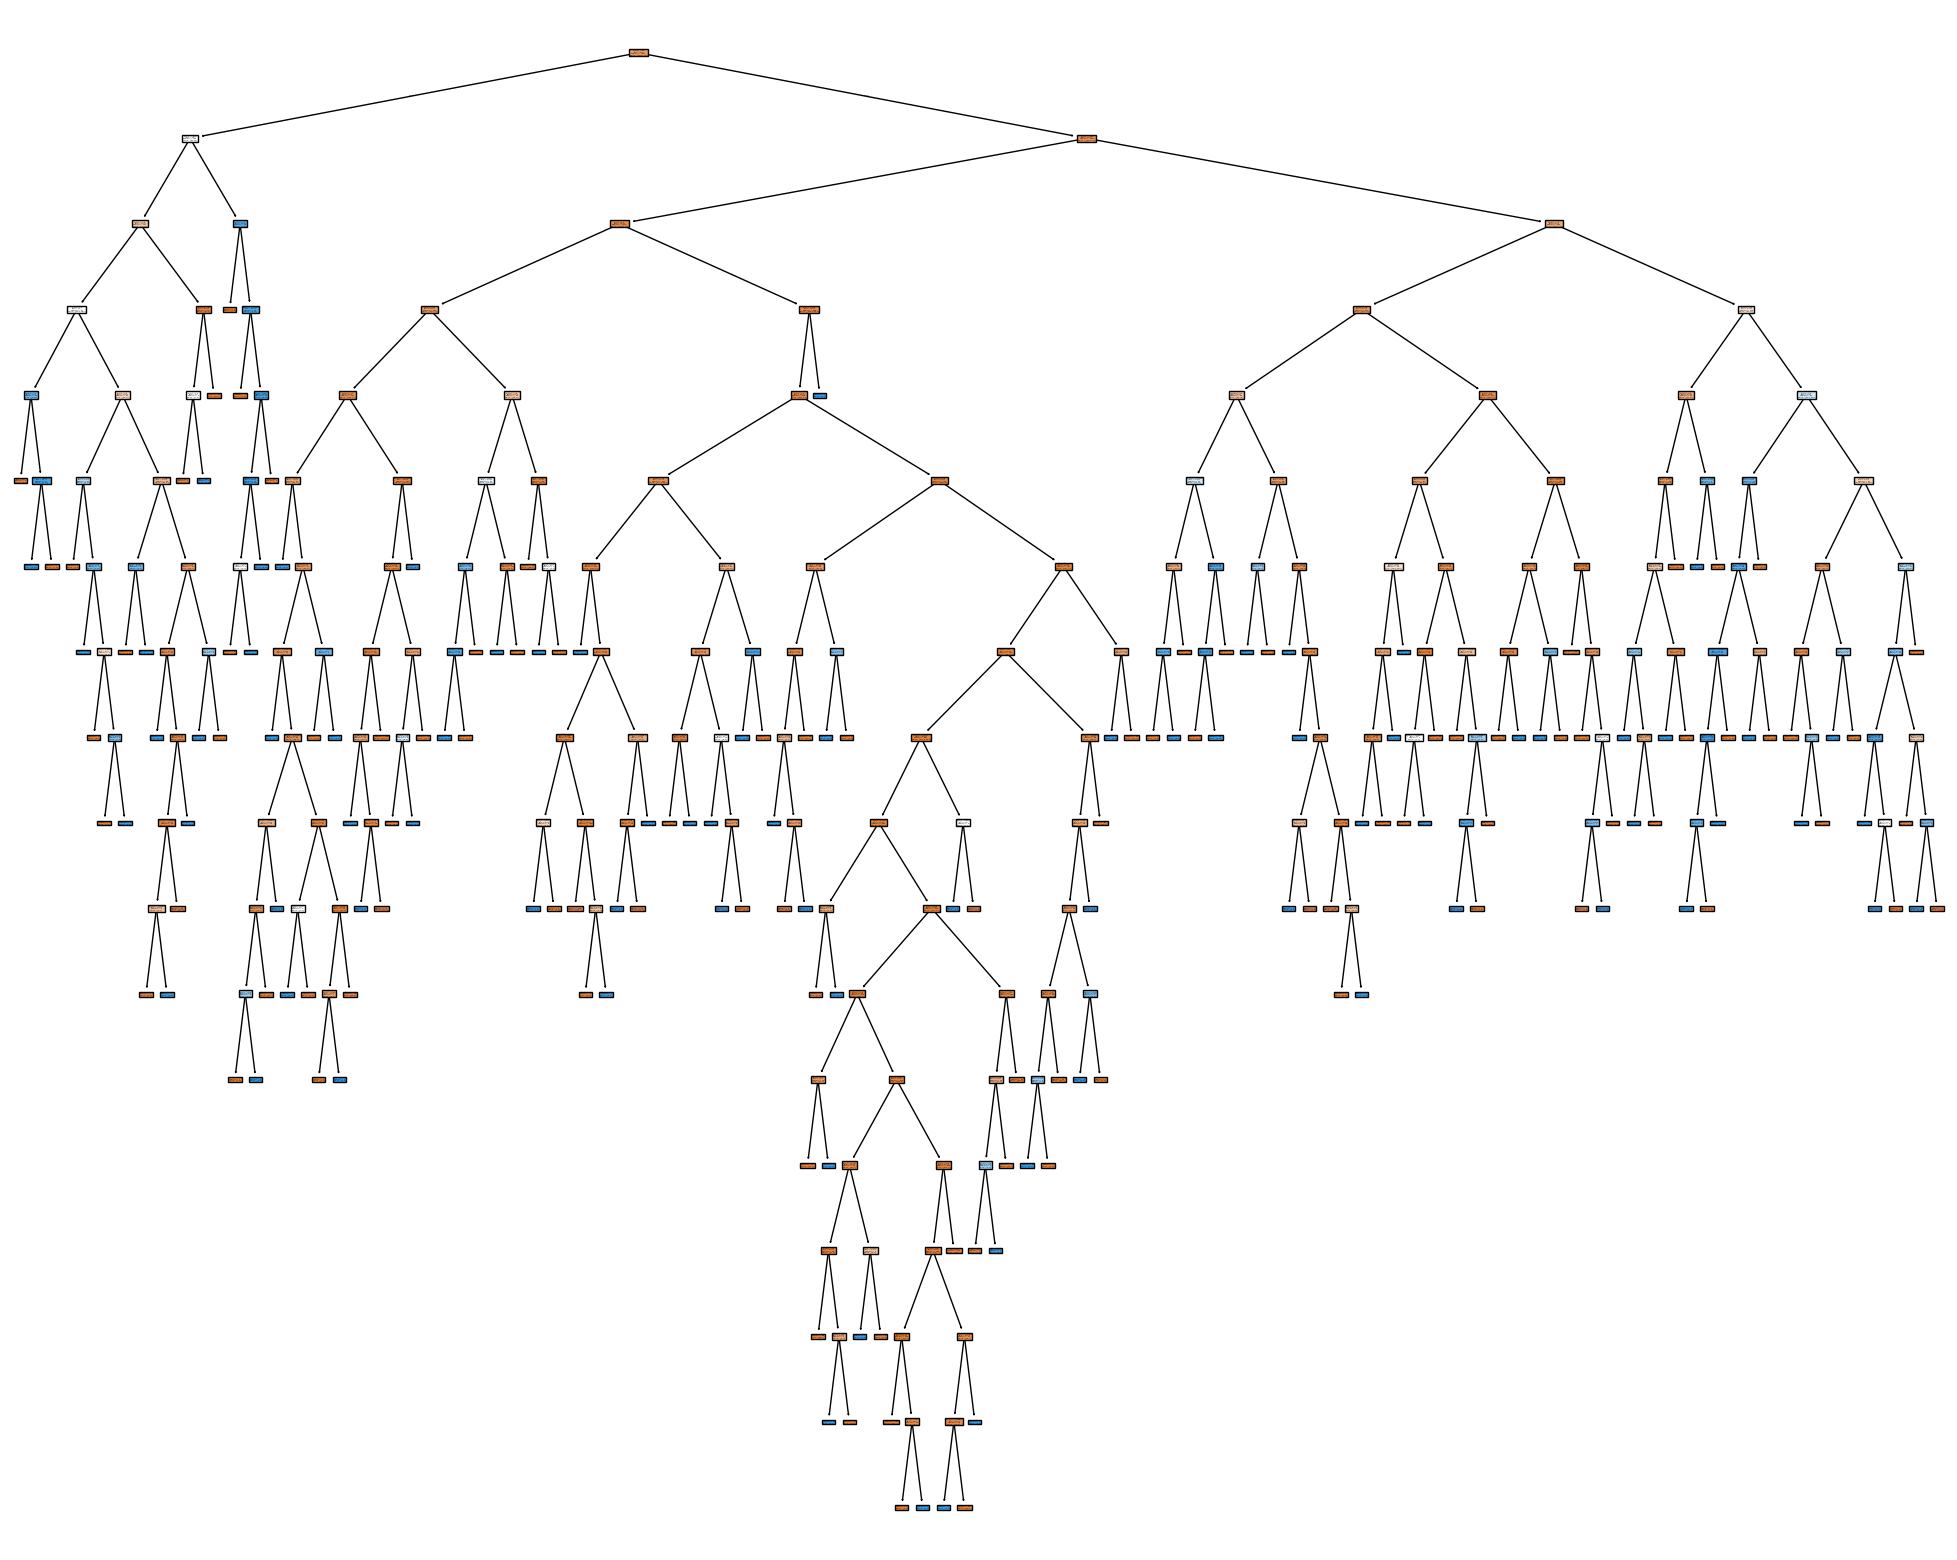

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
from sklearn import metrics
from sklearn import tree

# Here, we set our model to classification tree
clf = tree.DecisionTreeClassifier(random_state=SEED)
# Now, we train it
clf.fit(X_train, y_train)
# We can see that the tree is inside
print(tree.export_text(clf))

|--- feature_23 <= 2.50
|   |--- feature_1 <= 7.87
|   |   |--- feature_8 <= 31.50
|   |   |   |--- feature_6 <= 1.50
|   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_18 >  0.50
|   |   |   |   |   |--- feature_19 <= 130110.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_19 >  130110.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  1.50
|   |   |   |   |--- feature_7 <= 2.50
|   |   |   |   |   |--- feature_25 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_25 >  0.50
|   |   |   |   |   |   |--- feature_23 <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_23 >  1.50
|   |   |   |   |   |   |   |--- feature_1 <= 6.70
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  6.70
|   |   |   |   |   |   |   |   |--- feature_24 <= 1.00
|   |   |   |   |   |   |   |   |   |--- class: 0
| 

In [51]:
y_test_pred = clf.predict(X_test)

In [52]:
from sklearn import metrics
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
print(accuracy_tree)

0.8815653964984552


In [60]:
final_clf = tree.DecisionTreeClassifier(random_state=SEED)
# Making results reproducible, in case training a tree contains random decisions

# Now, we train it
final_clf.fit(X_train, y_train)
# final_clf contains the model that would be used by the company
# Its estimated accuracy is what we computed before (95%)

DecisionTreeClassifier(random_state=7)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

# Here, we set our model to classification tree
clf = tree.DecisionTreeClassifier(random_state=SEED)
# We train it
clf.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = clf.predict(X_test)
# We compute accuracy
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the tree: {accuracy_tree} ")

# We finally compute the final model with all available data

final_clf = tree.DecisionTreeClassifier(random_state=SEED)
final_clf.fit(X_train, y_train)

Accuracy of the tree: 0.9031925849639547 


DecisionTreeClassifier(random_state=7)

In [64]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

In [56]:
from sklearn.model_selection import cross_val_score, KFold

# create a k-fold crossvalidation iterator of k=5 folds
# shuffle = True randomly rearranges the dataframe
# random_state = 7 is for making the folds reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
clf = tree.DecisionTreeClassifier(random_state=SEED)

scores = cross_val_score(clf, X, y, scoring='accuracy', cv = cv)

print(f"All the accuracies are: {scores}")
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

All the accuracies are: [0.91836735 0.92006803 0.89285714 0.93197279 0.89115646]
And the average crossvalidation accuracy is: 0.91 +- 0.02


In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

print(f"Best params for Decision Tree: {grid_tree.best_params_}")

Best params for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}


In [68]:
from sklearn.metrics import balanced_accuracy_score

y_pred_tree = grid_tree.best_estimator_.predict(X_test)
bal_acc_tree = balanced_accuracy_score(y_test, y_pred_tree)

print(f"Balanced Accuracy (Decision Tree): {bal_acc_tree:.2f}")


Balanced Accuracy (Decision Tree): 0.82
